# Introduction

The purpose of this notebook is to take a deep dive into the dataset provided for the competition and understand some of the general trends and features that occur in the supplied source datafiles. This particular notebook is broken into two parts:

* Exploratory Data Analysis (EDA) - a walkthrough of various trends and data, along with a summary of key observations from each.
* Empirical Modeling - empirical testing of observations through the use of simple models.

In this competition, we are looking at the Unified Parkinson's Disease Rating Scale (UPDRS) that was revised by the Movement Disorder Society (MDS) in 2008. This new scale - the MDS-UPDRS (which we will refer to within this EDA as simply the UPDRS) - consists of 4 separate parts. Each part consists of a questionnaire that rates signs or symptoms of Parkinson's Disease (PD). According to Holden et al (2018), the individual parts consist of:

* Part I - Non-Motor Aspects of Experiences of Daily Living
* Part II - Motor Aspects of Experiences of Daily Living
* Part III - Motor Examination
* Part IV - Motor Complications

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import gc

import warnings
warnings.filterwarnings('ignore')

train_clinical_data = pd.read_csv("../data/raw/train_clinical_data.csv")
train_peptides = pd.read_csv("../data/raw/train_peptides.csv")
train_protiens = pd.read_csv("../data/raw/train_proteins.csv")
supplemental_clinical_data = pd.read_csv("../data/raw/supplemental_clinical_data.csv")

In [2]:
train_clinical_data

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,55,0,10.0,6.0,15.0,NaN,NaN
1,55_3,55,3,10.0,7.0,25.0,NaN,NaN
2,55_6,55,6,8.0,10.0,34.0,NaN,NaN
3,55_9,55,9,8.0,9.0,30.0,0.0,On
4,55_12,55,12,10.0,10.0,41.0,0.0,On
...,...,...,...,...,...,...,...,...
2610,65043_48,65043,48,7.0,6.0,13.0,0.0,Off
2611,65043_54,65043,54,4.0,8.0,11.0,1.0,Off
2612,65043_60,65043,60,6.0,6.0,16.0,1.0,Off
2613,65043_72,65043,72,3.0,9.0,14.0,1.0,Off


In [3]:
print(": Found {:,d} unique patient_id values".format(train_clinical_data["patient_id"].nunique()))
print(": Found {:,d} unique visit_month values".format(train_clinical_data["visit_month"].nunique()))

: Found 248 unique patient_id values
: Found 17 unique visit_month values


In [4]:
train_peptides

,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance
0,55_0,0,55,O00391,NEQEQPLGQWHLS,11254.30
1,55_0,0,55,O00533,GNPEPTFSWTK,102060.00
2,55_0,0,55,O00533,IEIPSSVQQVPTIIK,174185.00
3,55_0,0,55,O00533,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,27278.90
4,55_0,0,55,O00533,SMEQNGPGLEYR,30838.70
...,...,...,...,...,...,...
981829,58648_108,108,58648,Q9UHG2,ILAGSADSEGVAAPR,202820.00
981830,58648_108,108,58648,Q9UKV8,SGNIPAGTTVDTK,105830.00
981831,58648_108,108,58648,Q9Y646,LALLVDTVGPR,21257.60
981832,58648_108,108,58648,Q9Y6R7,AGC(UniMod_4)VAESTAVC(UniMod_4)R,5127.26


In [5]:
print(": Found {:,d} unique patient_id values".format(train_peptides["patient_id"].nunique()))
print(": Found {:,d} unique UniProt values".format(train_peptides["UniProt"].nunique()))
print(": Found {:,d} unique Peptide values".format(train_peptides["Peptide"].nunique()))

: Found 248 unique patient_id values
: Found 227 unique UniProt values
: Found 968 unique Peptide values


In [6]:
train_protiens

,visit_id,visit_month,patient_id,UniProt,NPX
0,55_0,0,55,O00391,11254.3
1,55_0,0,55,O00533,732430.0
2,55_0,0,55,O00584,39585.8
3,55_0,0,55,O14498,41526.9
4,55_0,0,55,O14773,31238.0
...,...,...,...,...,...
232736,58648_108,108,58648,Q9UBX5,27387.8
232737,58648_108,108,58648,Q9UHG2,369437.0
232738,58648_108,108,58648,Q9UKV8,105830.0
232739,58648_108,108,58648,Q9Y646,21257.6


In [7]:
print(": Found {:,d} unique patient_id values".format(train_protiens["patient_id"].nunique()))
print(": Found {:,d} unique visit_month values".format(train_protiens["visit_month"].nunique()))
print(": Found {:,d} unique UniProt values".format(train_protiens["UniProt"].nunique()))

: Found 248 unique patient_id values
: Found 15 unique visit_month values
: Found 227 unique UniProt values


In [8]:
supplemental_clinical_data

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,35_0,35,0,5.0,3.0,16.0,0.0,NaN
1,35_36,35,36,6.0,4.0,20.0,0.0,NaN
2,75_0,75,0,4.0,6.0,26.0,0.0,NaN
3,75_36,75,36,1.0,8.0,38.0,0.0,On
4,155_0,155,0,NaN,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...
2218,65382_0,65382,0,NaN,NaN,0.0,NaN,NaN
2219,65405_0,65405,0,5.0,16.0,31.0,0.0,NaN
2220,65405_5,65405,5,NaN,NaN,57.0,NaN,NaN
2221,65530_0,65530,0,10.0,6.0,24.0,0.0,NaN


In [9]:
print(": Found {:,d} unique patient_id values".format(supplemental_clinical_data["patient_id"].nunique()))
print(": Found {:,d} unique visit_month values".format(supplemental_clinical_data["visit_month"].nunique()))

: Found 771 unique patient_id values
: Found 8 unique visit_month values


In [10]:
combined = pd.concat([train_clinical_data, supplemental_clinical_data]).reset_index(drop=True)
combined

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,55,0,10.0,6.0,15.0,NaN,NaN
1,55_3,55,3,10.0,7.0,25.0,NaN,NaN
2,55_6,55,6,8.0,10.0,34.0,NaN,NaN
3,55_9,55,9,8.0,9.0,30.0,0.0,On
4,55_12,55,12,10.0,10.0,41.0,0.0,On
...,...,...,...,...,...,...,...,...
4833,65382_0,65382,0,NaN,NaN,0.0,NaN,NaN
4834,65405_0,65405,0,5.0,16.0,31.0,0.0,NaN
4835,65405_5,65405,5,NaN,NaN,57.0,NaN,NaN
4836,65530_0,65530,0,10.0,6.0,24.0,0.0,NaN


In [11]:
print(": Found {:,d} unique patient_id values".format(combined["patient_id"].nunique()))
print(": Found {:,d} unique visit_month values".format(combined["visit_month"].nunique()))

: Found 1,019 unique patient_id values
: Found 18 unique visit_month values


There are quite a few observations to unpack here. Let's summarize them.

### Key Observations About Initial Impressions


* For `train_clinical_data`:
    * This dataset represents the scores that a patient had on a particular month for part N of the [Unified Parkinson's Disease Rating Scale](https://www.movementdisorders.org/MDS/MDS-Rating-Scales/MDS-Unified-Parkinsons-Disease-Rating-Scale-MDS-UPDRS.htm)
    * Contains a mixture of categorical (`upd23b_clinical_state_on_medication`) and continuous (`visit_month`, `updrs_[1-4]`) features.
    * Contains 2,615 rows of data, and spans:
        * 248 unique `patient_id` values
* For `train_peptides`:
    * This dataset represents the peptide frequencies within the CSF seen for a particular patient on a particular month.
    * This dataset joins to the `train_clinical_data` dataset based on `visit_id`.
    * Contains a mixture of categorical (`UniProt`, `Peptide`) and continuous (`Peptide Abundance`) features.
    * Contains 981,834 rows of data, and spans:
        * 248 unique `patient_id` values
        * 227 unique `UnitProt` values
        * 968 unique `Peptide` values
* For `train_proteins`:
    * This dataset represents the protein expression frequencies within the CSF seen for a particular patient on a particular month.
    * This dataset joins to the `train_clinical_data` dataset based on `visit_id`.
    * Contains a mixture of categorical (`UniProt`) and continuous (`NPX`) features.
    * Contains 232,741 rows of data, and spans:
        * 248 unique `patient_id` values
        * 227 unique `UniProt` values
* For `supplemental_clinical_data`:
    * This dataset represents supplemental information that does not have any protein or peptide measurements from CSF, and represents the scores that a patient had on a particular month for part N of the [Unified Parkinson's Disease Rating Scale](https://www.movementdisorders.org/MDS/MDS-Rating-Scales/MDS-Unified-Parkinsons-Disease-Rating-Scale-MDS-UPDRS.htm)
    * Contains a mixture of categorical (`upd23b_clinical_state_on_medication`) and continuous (`visit_month`, `updrs_[1-4]`) features.
    * Contains 2,223 rows of data, and spans:
        * 771 unique `patient_id` values
* In total, there are:
    * 4,838 unique visits
    * 1,019 unique patients
    * 18 unique month values

# Statistical Breakdown

Let's take a closer look at some of the statistical properties of the continuous features. 

## Clinical vs Supplemental Data

To begin, let's compare the clinical data to the supplemental data to see what kind of differences we have.

### Clinical Data

In [12]:
features = [
    'visit_month', 'updrs_1', 'updrs_2', 'updrs_3', 'updrs_4',
]

train_clinical_data[features].describe().T.style.bar(subset=['mean'], color='#7BCC70')\
    .background_gradient(subset=['std'], cmap='Reds')\
    .background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
visit_month,2615.000000,31.190822,25.199053,0.000000,10.500000,24.000000,48.000000,108.000000
updrs_1,2614.000000,7.110559,5.525955,0.000000,3.000000,6.000000,10.000000,33.000000
updrs_2,2613.000000,6.743590,6.323230,0.000000,1.000000,5.000000,10.000000,40.000000
updrs_3,2590.000000,19.421236,15.000289,0.000000,6.000000,19.000000,29.000000,86.000000
updrs_4,1577.000000,1.861763,3.022112,0.000000,0.000000,0.000000,3.000000,20.000000


### Supplemental Data

In [13]:
features = [
    'visit_month', 'updrs_1', 'updrs_2', 'updrs_3', 'updrs_4',
]

supplemental_clinical_data[features].describe().T.style.bar(subset=['mean'], color='#7BCC70')\
    .background_gradient(subset=['std'], cmap='Reds')\
    .background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
visit_month,2223.000000,12.910481,13.060532,0.000000,0.000000,6.000000,24.000000,36.000000
updrs_1,2010.000000,5.684080,4.366964,0.000000,2.000000,5.000000,8.000000,27.000000
updrs_2,2009.000000,6.507715,4.968132,0.000000,2.000000,5.000000,10.000000,34.000000
updrs_3,2218.000000,22.917944,12.342596,0.000000,14.000000,22.000000,31.000000,72.000000
updrs_4,1295.000000,0.840154,1.860247,0.000000,0.000000,0.000000,0.000000,12.000000


Supplemental data appears to have visits that occur mainly between 0 and 36 months, while clinical data shows visits occurring between 0 and 108 months. We can confirm this by looking at kernel density estimates for the months of the various visits.

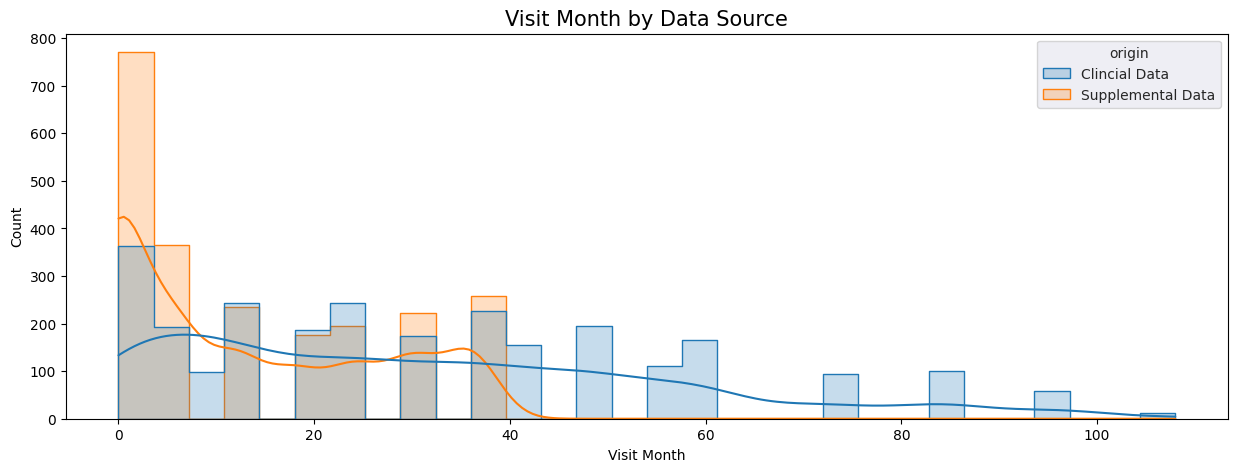

In [14]:
train_clinical_data["origin"] = "Clincial Data"
supplemental_clinical_data["origin"] = "Supplemental Data"

combined = pd.concat([train_clinical_data, supplemental_clinical_data]).reset_index(drop=True)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

sns.set_style('darkgrid')

_ = sns.histplot(data=combined, x="visit_month", hue="origin", kde=True, ax=ax, element="step")
_ = ax.set_title("Visit Month by Data Source", fontsize=15)
_ = ax.set_ylabel("Count")
_ = ax.set_xlabel("Visit Month")

As we can see, the supplemental data is focused around 0 month visits, and ends at 36 months, while the clinical data spans a much longer time-frame. We can also do a quick visual check to see if there are differences between the clinical and supplemental data when it comes to UPDRS scores. For the figures below, the trend lines are kernel density estimates, thus differences in data/raw counts are taken into consideration with the trend lines.

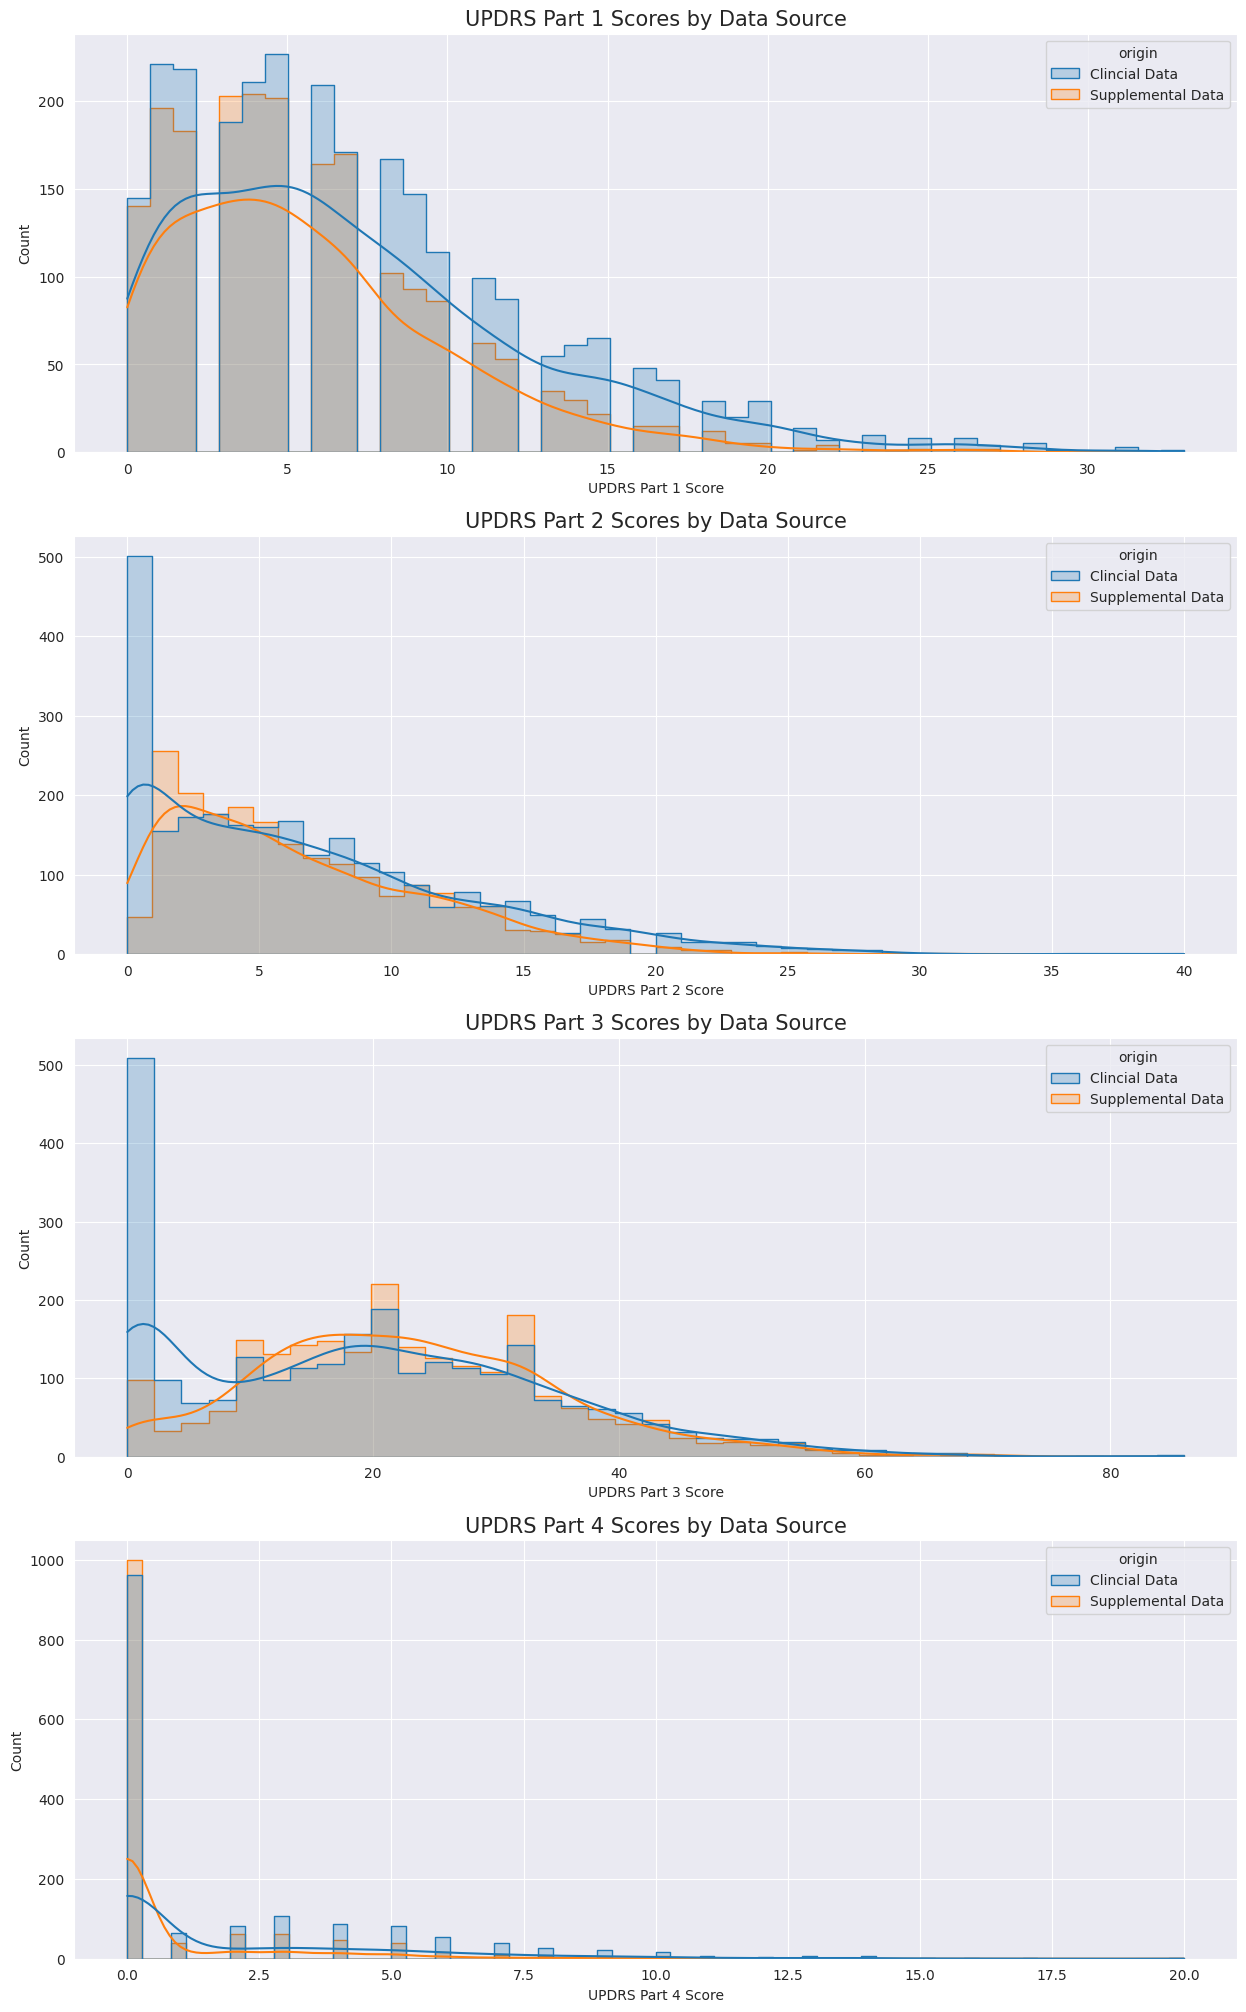

In [15]:
train_clinical_data["origin"] = "Clincial Data"
supplemental_clinical_data["origin"] = "Supplemental Data"

combined = pd.concat([train_clinical_data, supplemental_clinical_data]).reset_index(drop=True)

features = ["updrs_1", "updrs_2", "updrs_3", "updrs_4"]
labels = ["UPDRS Part 1", "UPDRS Part 2", "UPDRS Part 3", "UPDRS Part 4"]

fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(15, 25))

sns.set_style('darkgrid')

axs = axs.flatten()

sns.set_style('darkgrid')

for x, feature in enumerate(features):
    ax = axs[x]
    _ = sns.histplot(data=combined, x=feature, hue="origin", kde=True, ax=ax, element="step")
    _ = ax.set_title("{} Scores by Data Source".format(labels[x]), fontsize=15)
    _ = ax.set_ylabel("Count")
    _ = ax.set_xlabel("{} Score".format(labels[x]))

There are a few interesting observations:

* UPDRS Part 1 and 4 scores appear to be fairly similar in their distribution between the clinical and supplemental data sources.
* UPDRS Part 2 and 3 scores have a much higher proportion of 0 based scores in the clinical data when compared to the supplemental data source.

## Protein Data

Let's take a look at the values we have for protein data.

In [16]:
train_protiens[["NPX"]].describe().T.style.bar(subset=['mean'], color='#7BCC70')\
    .background_gradient(subset=['std'], cmap='Reds')\
    .background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
NPX,232741.000000,2712076.943823,22241547.317363,84.608200,29464.400000,113556.000000,563894.000000,613851000.000000


Protein expression frequency values appear to have a wide range of values. We'll use a quick kernel density estimate to get an idea of where frequencies are clustered. We'll use a logarithmic scale due to the large values and potential variability involved in the expression frequencies.

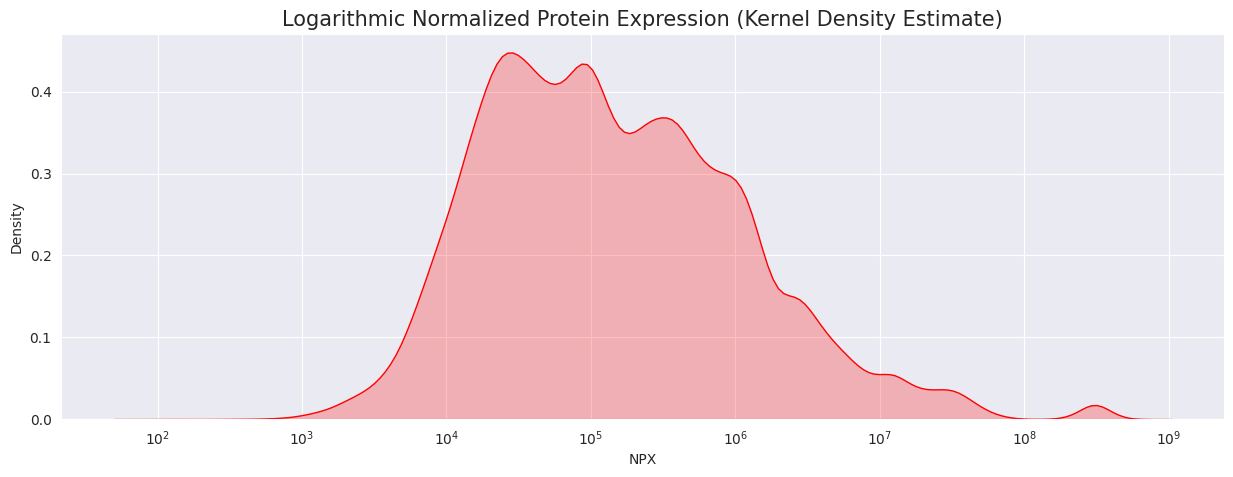

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

sns.set_style('darkgrid')

_ = sns.kdeplot(train_protiens["NPX"], shade=True, color="r", ax=ax, label="Normalized Protein Expression", log_scale=True)
_ = ax.set_title("Logarithmic Normalized Protein Expression (Kernel Density Estimate)", fontsize=15)

As we can see, there is a lot of variability regarding the actual protein expression frequencies. We'll look more into the distribution of various proteins and their association to the UPDRS scores in section 2 below. For now, the key observation we have is that normalized protein expression is highly variable, as indicated by the min, max, and standard deviation of the feature.

## Peptide Data

Let's take a look at what we have for the peptide data.

In [18]:
train_peptides[["PeptideAbundance"]].describe().T.style.bar(subset=['mean'], color='#7BCC70')\
    .background_gradient(subset=['std'], cmap='Reds')\
    .background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
PeptideAbundance,981834.000000,642890.245933,3377989.092586,10.998500,28174.250000,74308.300000,221338.750000,178752000.000000


Again, we see a wide variation in the abundance of peptides. The min, max, and standard deviation tell us that peptide abundances will likely vary greatly depending on the particular peptide we are looking at. Again, we can plot kernel density estimates to give us an idea of where the bulk of our values exist.

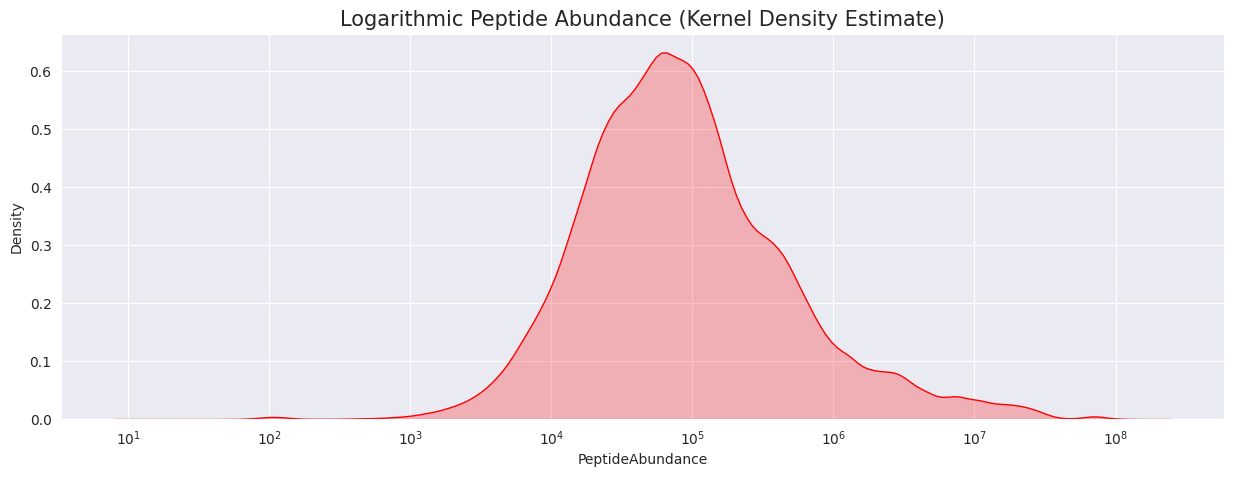

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

sns.set_style('darkgrid')

_ = sns.kdeplot(train_peptides["PeptideAbundance"], shade=True, color="r", ax=ax, label="Peptide Abundance", log_scale=True)
_ = ax.set_title("Logarithmic Peptide Abundance (Kernel Density Estimate)", fontsize=15)

Once again, we'll look at peptide data - specifically peptide sequences and how they relate to UPDRS scores - in section 2 below.

### Key Observations About Statistical Breakdown

* The clinical data and supplementary data have very different month ranges:
    * This was confirmed by looking at their statistical properties, histograms, and adversarial validation.
* Protein expression data has a wide range of values, and thus will need to be further broken down into sub-groupings to be informative.
* Peptide abundance frequencies has a wide range of values, and thus will need to be further broken down into sub-groupings to be informative.

# Feature Exploration

In this section, we will examine each of the features we have to work with in more detail.

# Visit Month

The visit month has an impact across all of the different datasets, and subsequently, through many different features that we have. Let's take a look at them in turn.

# Visit Month vs UPDRS 

For each visit month, we have observations about the target features - UPDRS scores. According to Holden et al (2018), the findings in each part of the UPDRS were dependent on whether or not the patient was taking medication. We should sub-divide the UPDRS score observations into groups that were taking medication, and those that were not. For the purposes of this exploration, a null value found in clinical data regarding medication state will be considered to be `Off`.

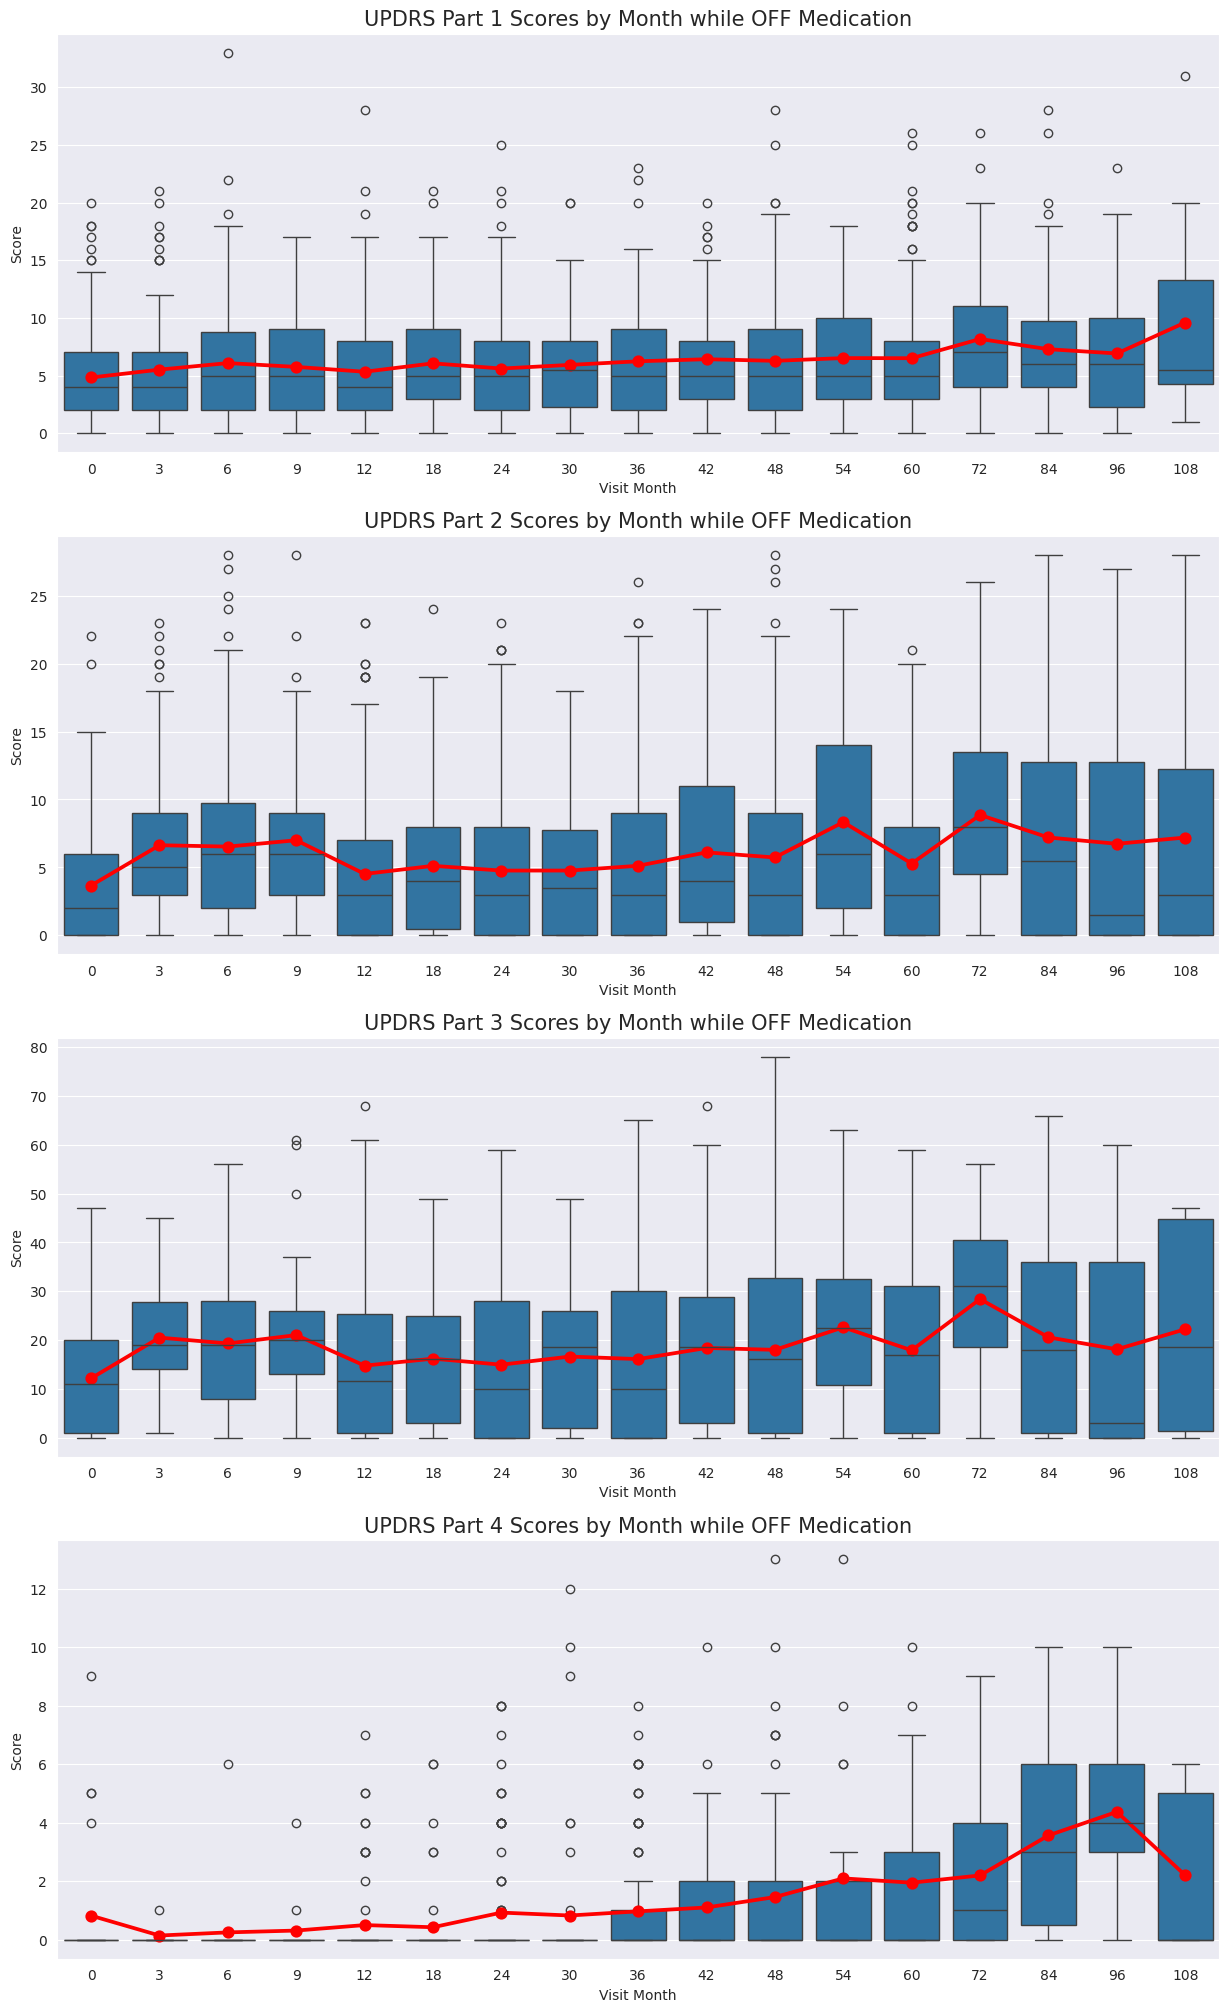

In [20]:
train_clincial_data_copy = train_clinical_data.copy()
train_clincial_data_copy["upd23b_clinical_state_on_medication"] = train_clincial_data_copy["upd23b_clinical_state_on_medication"].fillna("Off")

fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(15, 25))

sns.set_style('darkgrid')

axs = axs.flatten()

for x, feature in enumerate(["updrs_1", "updrs_2", "updrs_3", "updrs_4"]):
    ax = axs[x]
    data = train_clincial_data_copy[(train_clincial_data_copy["upd23b_clinical_state_on_medication"] == "Off")]
    _ = sns.boxplot(data=data, x="visit_month", y=feature, ax=ax)
    _ = sns.pointplot(data=data, x="visit_month", y=feature, color="r", ci=None, ax=ax)
    _ = ax.set_title("UPDRS Part {} Scores by Month while OFF Medication".format(x+1), fontsize=15)
    _ = ax.set_xlabel("Visit Month")
    _ = ax.set_ylabel("Score")

Some general observations when OFF medication:
    
* There is a large amount of variance and outliers across each of the UPDRS parts and their respective visit months.
* In general across UPDRS Parts 1 - 3, the trendline of score remains relatively flat.
    * With UPDRS Part 4, we see a gradual increase in score.

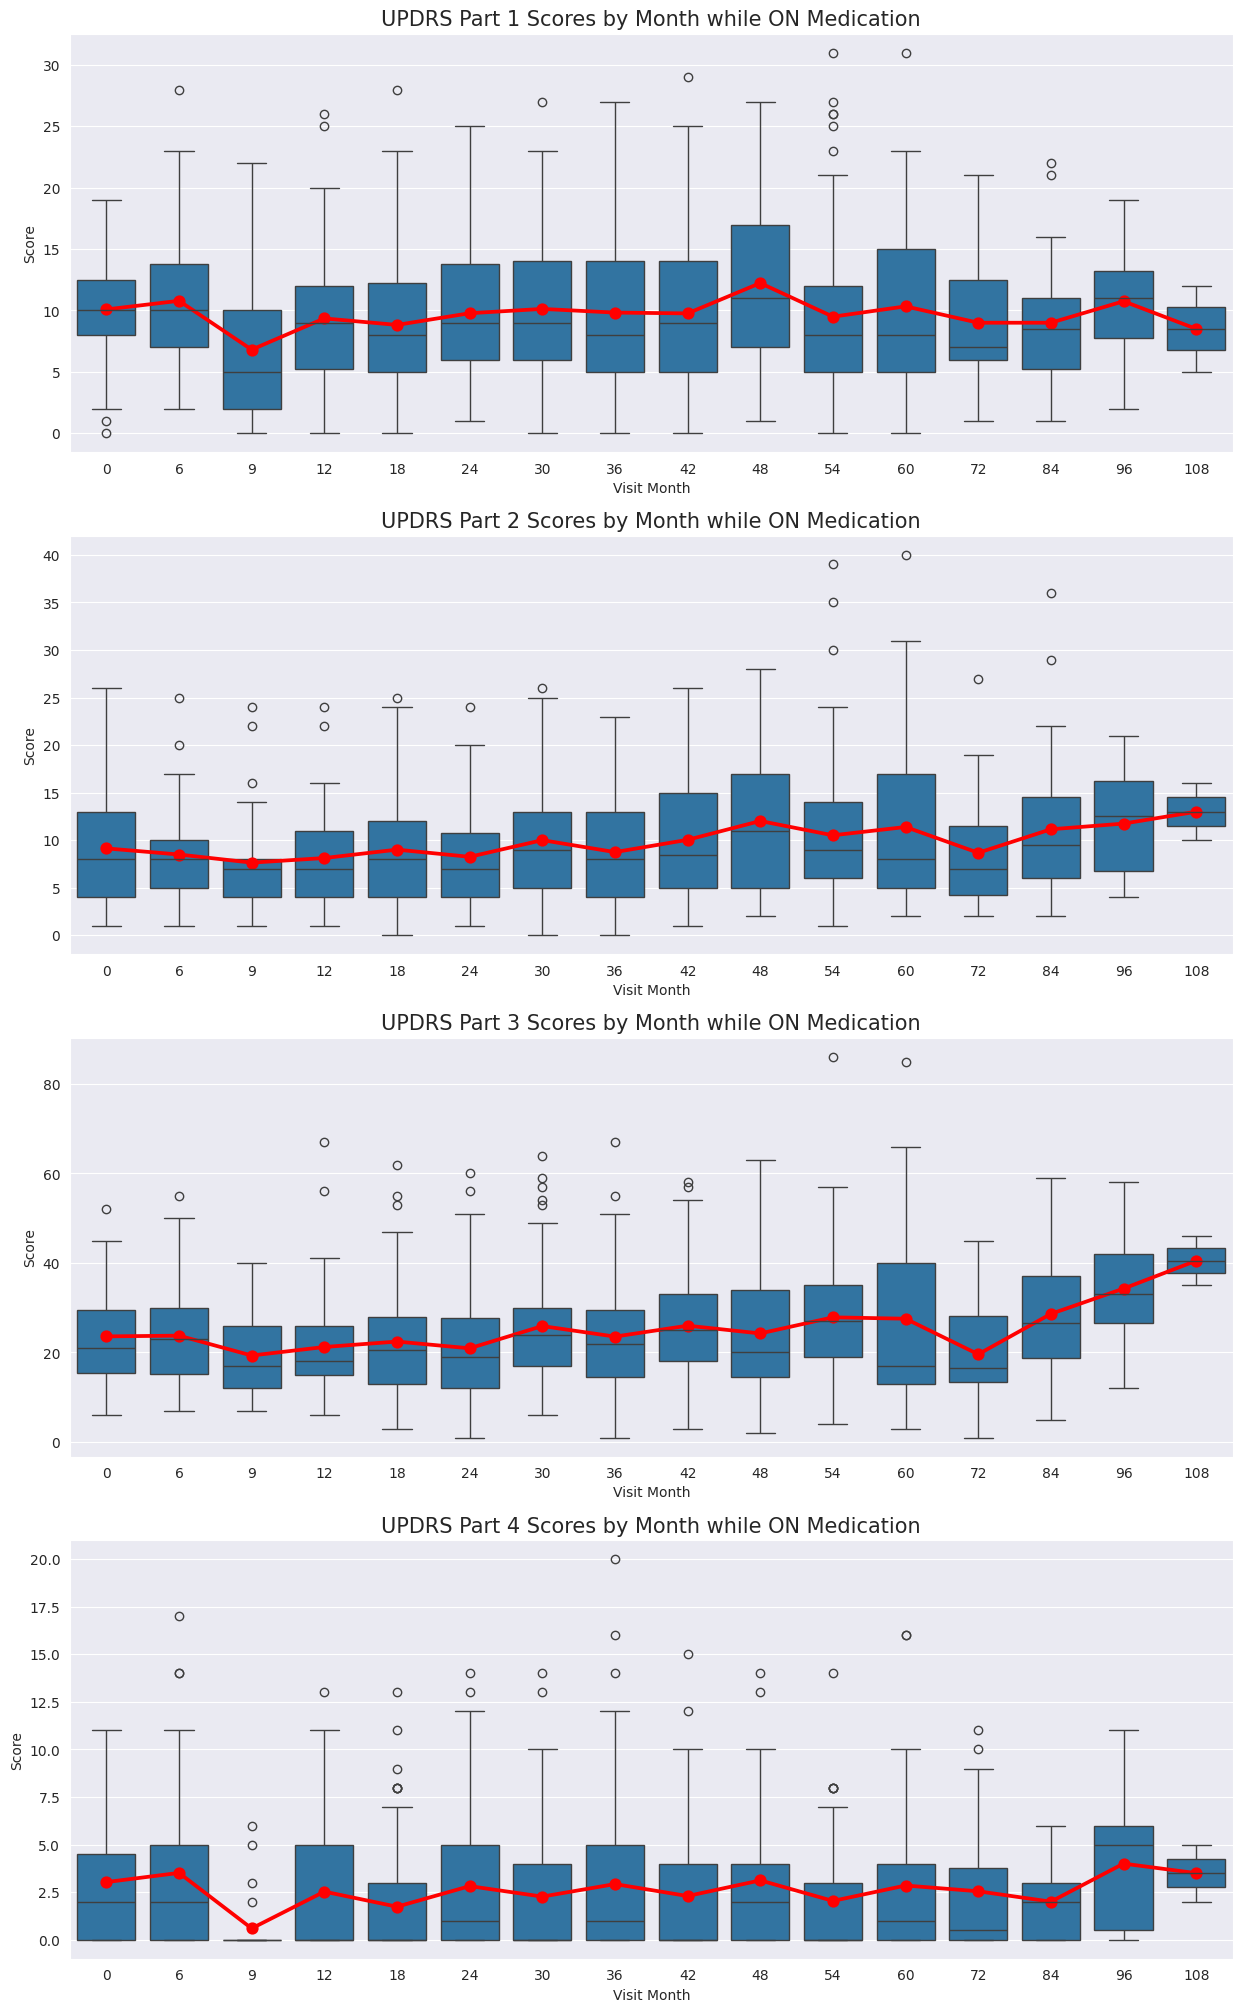

In [21]:
train_clincial_data_copy = train_clinical_data.copy()
train_clincial_data_copy["upd23b_clinical_state_on_medication"] = train_clincial_data_copy["upd23b_clinical_state_on_medication"].fillna("Off")

fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(15, 25))

sns.set_style('darkgrid')

axs = axs.flatten()

for x, feature in enumerate(["updrs_1", "updrs_2", "updrs_3", "updrs_4"]):
    ax = axs[x]
    data = train_clincial_data_copy[(train_clincial_data_copy["upd23b_clinical_state_on_medication"] == "On")]
    _ = sns.boxplot(data=data, x="visit_month", y=feature, ax=ax)
    _ = sns.pointplot(data=data, x="visit_month", y=feature, color="r", ci=None, ax=ax)
    _ = ax.set_title("UPDRS Part {} Scores by Month while ON Medication".format(x+1), fontsize=15)
    _ = ax.set_xlabel("Visit Month")
    _ = ax.set_ylabel("Score")

Some general observations when ON medication:
    
* There is a large amount of variance and outliers across each of the UPDRS parts and their respective visit months.
* In general across UPDRS Parts 1, 2, and 4, the trendline of score remains relatively flat.
    * With UPDRS Part 3, we see a gradual increase in score.

As mentioned by Holden et al (2018), the maximum score of the UPDRS is 272. In prior versions of the UPDRS, there was a linear progression of UPDRS score as time progressed. We should look at the sum total of the UPDRS scores to see if there is a score increase over time within this data.

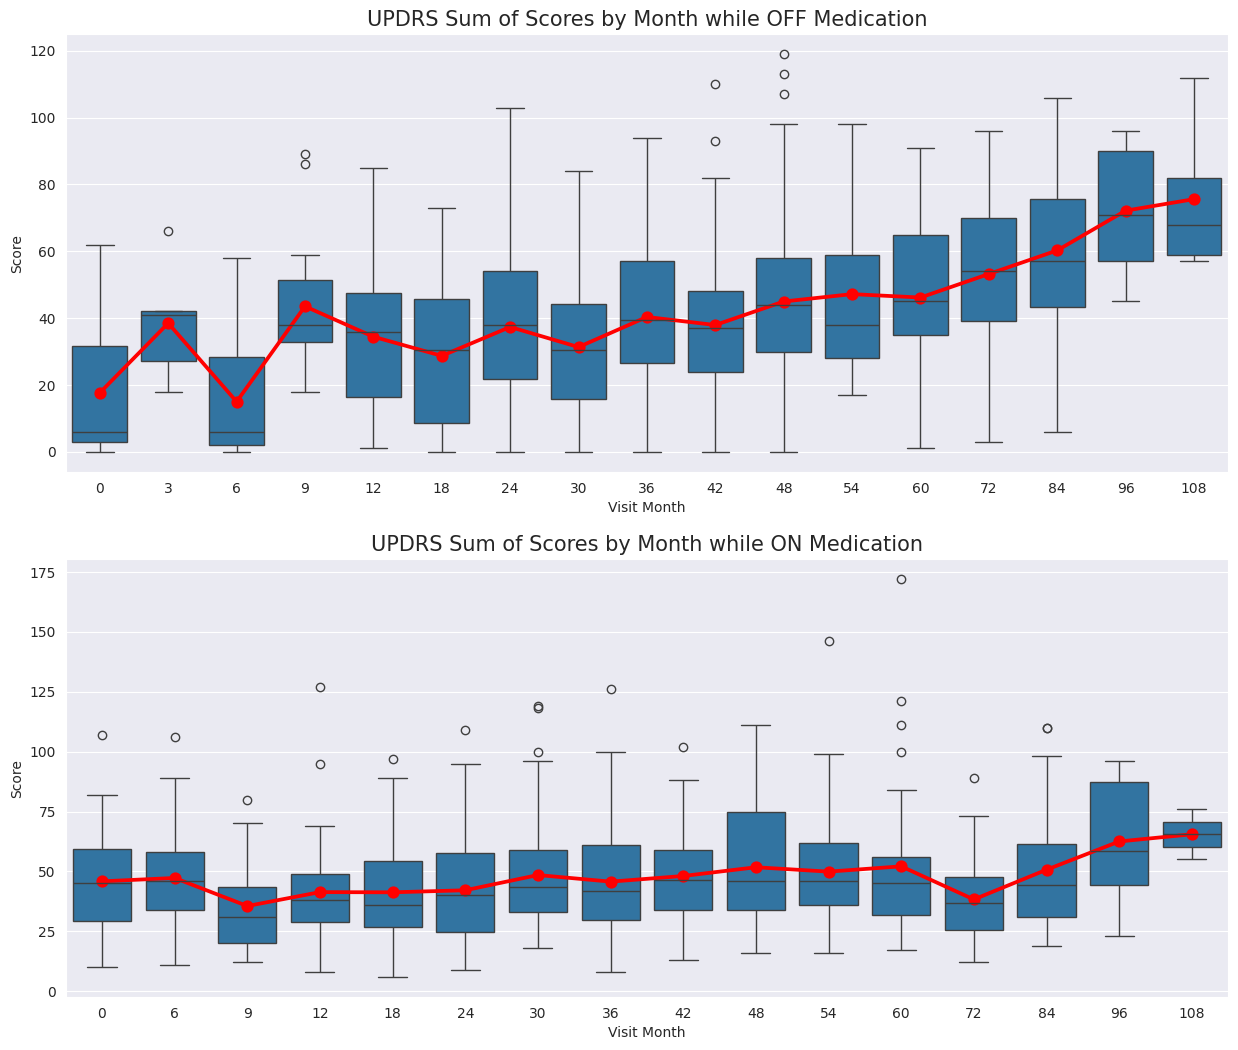

In [22]:
train_clinical_data["updrs_sum"] = train_clinical_data["updrs_1"] + train_clinical_data["updrs_2"] + train_clinical_data["updrs_3"] + train_clinical_data["updrs_4"]
train_clincial_data_copy = train_clinical_data.copy()
train_clincial_data_copy["upd23b_clinical_state_on_medication"] = train_clincial_data_copy["upd23b_clinical_state_on_medication"].fillna("Off")

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(15, 12.5))

axs = axs.flatten()

sns.set_style('darkgrid')

data = train_clincial_data_copy[(train_clincial_data_copy["upd23b_clinical_state_on_medication"] == "Off")]
ax = axs[0]
_ = sns.boxplot(data=data, x="visit_month", y="updrs_sum", ax=ax)
_ = sns.pointplot(data=data, x="visit_month", y="updrs_sum", color="r", ci=None, ax=ax)
_ = ax.set_title("UPDRS Sum of Scores by Month while OFF Medication".format(x+1), fontsize=15)
_ = ax.set_xlabel("Visit Month")
_ = ax.set_ylabel("Score")

data = train_clincial_data_copy[(train_clincial_data_copy["upd23b_clinical_state_on_medication"] == "On")]
ax = axs[1]
_ = sns.boxplot(data=data, x="visit_month", y="updrs_sum", ax=ax)
_ = sns.pointplot(data=data, x="visit_month", y="updrs_sum", color="r", ci=None, ax=ax)
_ = ax.set_title("UPDRS Sum of Scores by Month while ON Medication".format(x+1), fontsize=15)
_ = ax.set_xlabel("Visit Month")
_ = ax.set_ylabel("Score")

With the sum of all UPDRS scores while OFF medication, we see an upwards trend as the visit month increases, which indicates that overall, disease progression is occurring. While ON medication, the trendline remains relatively flat until months > 96, which sees an increase in overall score. Again, this indicates that disease progression is occurring. If we combine both ON and OFF medication status:

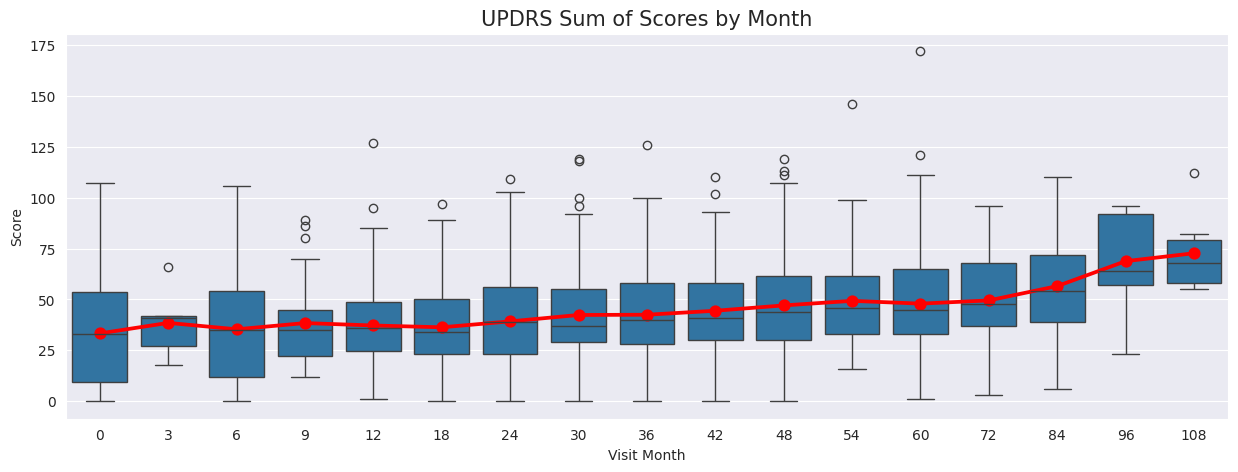

In [23]:
train_clinical_data["updrs_sum"] = train_clinical_data["updrs_1"] + train_clinical_data["updrs_2"] + train_clinical_data["updrs_3"] + train_clinical_data["updrs_4"]
train_clincial_data_copy = train_clinical_data.copy()
train_clincial_data_copy["upd23b_clinical_state_on_medication"] = train_clincial_data_copy["upd23b_clinical_state_on_medication"].fillna("Off")

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

sns.set_style('darkgrid')

_ = sns.boxplot(data=train_clincial_data_copy, x="visit_month", y="updrs_sum", ax=ax)
_ = sns.pointplot(data=train_clincial_data_copy, x="visit_month", y="updrs_sum", color="r", ci=None, ax=ax)
_ = ax.set_title("UPDRS Sum of Scores by Month", fontsize=15)
_ = ax.set_xlabel("Visit Month")
_ = ax.set_ylabel("Score")

Overall, we see a trend of increasing UPDRS scores. This observation is important, as it suggests that our scores should likely see increases as time progresses, rather than decreases. This can be used as a post-processing check to ensure predictions being made by our machine learning algorithms make sense.

# 2.1.2 - Visit Month vs Protein Data

Without diving too much into the actual protein data, we should check to see if there are general trends regarding the breakdown of protein data by month.

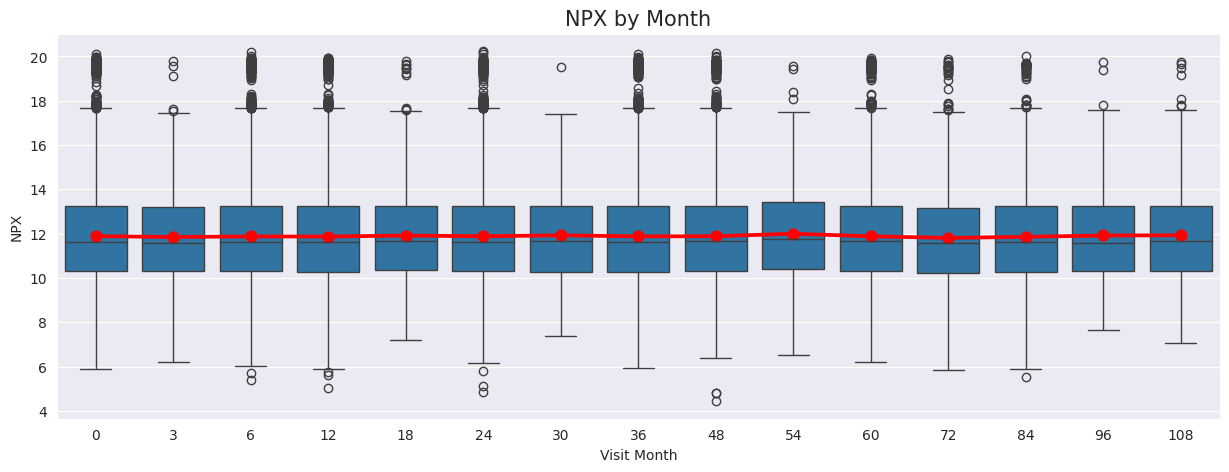

In [24]:
train_protiens_copy = train_protiens.copy()
train_protiens_copy["log_NPX"] = np.log(train_protiens_copy["NPX"])

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

sns.set_style('darkgrid')

_ = sns.boxplot(data=train_protiens_copy, x="visit_month", y="log_NPX", ax=ax)
_ = sns.pointplot(data=train_protiens_copy, x="visit_month", y="log_NPX", color="r", ci=None, ax=ax)
_ = ax.set_title("NPX by Month", fontsize=15)
_ = ax.set_xlabel("Visit Month")
_ = ax.set_ylabel("NPX")

Unsurprisingly, we see stable amounts of protein expressions across each month category. There is a large amount of variance regarding the protein expression frequencies, but overall, we're seeing the same mean total NPX values repeated across the months. This likely means that there will be differences in the actual proteins expressed, rather than their absolute numbers. 

We can check to see if there are any significant increases or decreases in `UniProt` proteins across the months. Looking at all 227 proteins is going to be challenging. For this, we'll look at proteins that have significant increases or decreases across the months. We'll examine protein counts for all 227 proteins, and then pick out ones that appear to have very large standard deviations compared to their mean. For this EDA, we'll look at any protein expression data that has a standard deviation of more than 25% of the mean value.

In [25]:
unique_proteins = train_protiens["UniProt"].unique()
unique_months = train_protiens["visit_month"].unique()

protein_dict = dict()
for protein in unique_proteins:
    if protein not in protein_dict:
        protein_dict[protein] = {
            "months": unique_months,
            "count_NPX": [train_protiens[(train_protiens["UniProt"] == protein) & (train_protiens["visit_month"] == month)]["NPX"].count() for month in unique_months],
            "total_NPX": [train_protiens[(train_protiens["UniProt"] == protein) & (train_protiens["visit_month"] == month)]["NPX"].sum() for month in unique_months],
            "avg_NPX": [0 * len(unique_months)],
        }
        
for protein in unique_proteins:
    protein_dict[protein]["avg_NPX"] = [float(total) / count for total, count in zip(protein_dict[protein]["total_NPX"], protein_dict[protein]["count_NPX"])]
    
for protein in unique_proteins:
    protein_dict[protein]["min_NPX"] = min(protein_dict[protein]["avg_NPX"])
    protein_dict[protein]["max_NPX"] = max(protein_dict[protein]["avg_NPX"])
    
for protein in unique_proteins:
    protein_dict[protein]["mean"] = sum(protein_dict[protein]["avg_NPX"]) / len(protein_dict[protein]["months"])
    protein_dict[protein]["std"] = sum([(total_NPX - protein_dict[protein]["mean"]) ** 2 for total_NPX in protein_dict[protein]["avg_NPX"]]) / (len(unique_months) - 1)
    protein_dict[protein]["std"] = protein_dict[protein]["std"] ** 0.5
    
proteins_with_large_std = [protein for protein in unique_proteins if protein_dict[protein]["std"] > (protein_dict[protein]["mean"] * .25)]

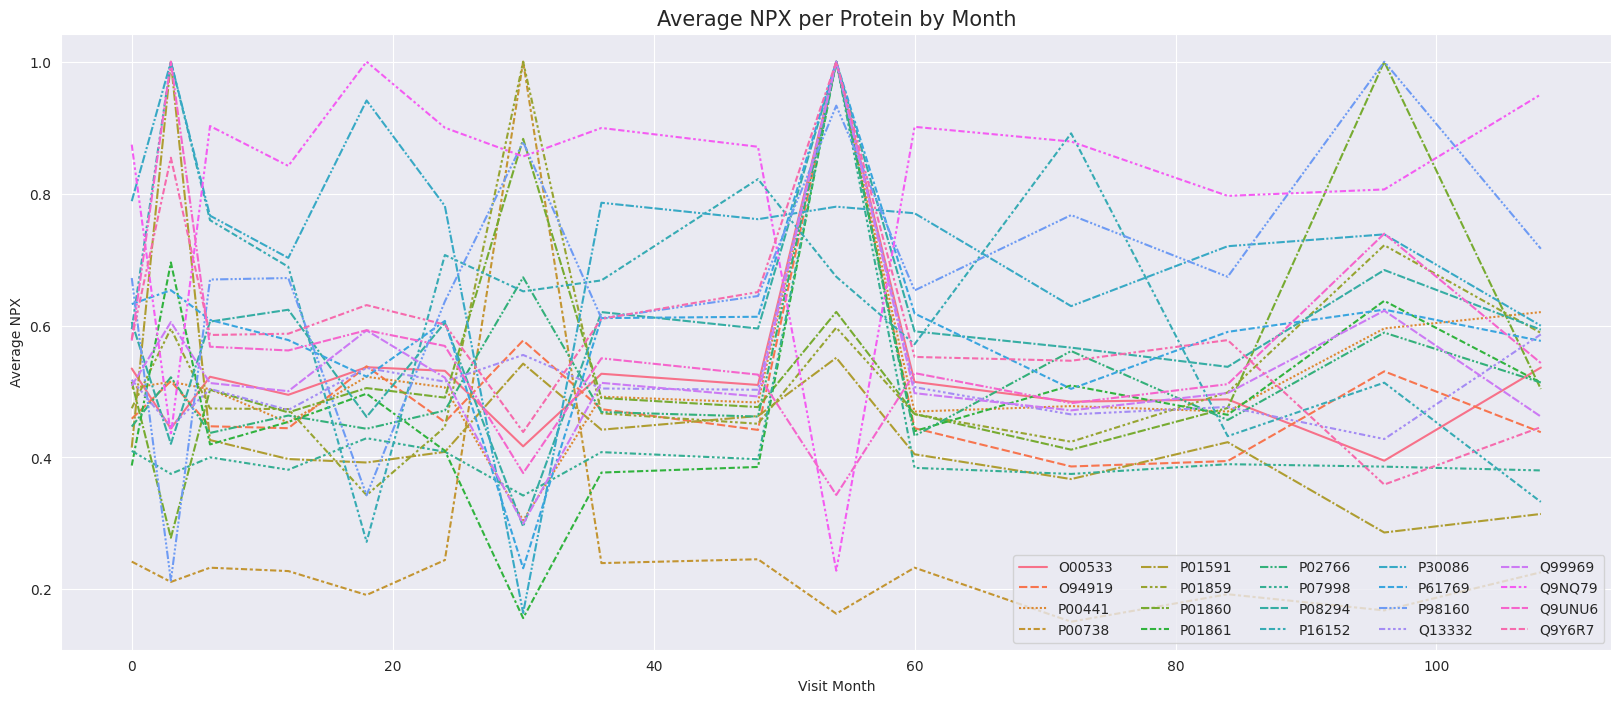

In [26]:
import math

proteins_of_interest_by_month = {
    "UniProt": [],
    "Visit Month": [],
    "Average NPX": [],
}
for protein in proteins_with_large_std:
    for month_index, month in enumerate(unique_months):
        proteins_of_interest_by_month["UniProt"].append(protein)
        proteins_of_interest_by_month["Visit Month"].append(month)
        value = protein_dict[protein]["avg_NPX"][month_index]
        value /= protein_dict[protein]["max_NPX"]
        proteins_of_interest_by_month["Average NPX"].append(value)
        
df = pd.DataFrame(proteins_of_interest_by_month)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 8))

sns.set_style('darkgrid')

_ = sns.lineplot(data=df, x="Visit Month", y="Average NPX", hue="UniProt", style="UniProt", ax=ax)
_ = ax.set_title("Average NPX per Protein by Month", fontsize=15)
_ = ax.set_xlabel("Visit Month")
_ = ax.set_ylabel("Average NPX")
_ = plt.legend(ncol=5)

There are some interesting observations to be made here. First, at months 30, 54, and 96 we see upward and downward spikes of the average levels of all the proteins of interest. Whether this is correlated with clinical data such as medication state or UPDRS scores is something we will look into in more detail below when we look directly at protein features. For now, we're just curious if there are correlations with proteins and visit month, which clearly there appear to be. 

The second observation is that several proteins have both upward and downward movement. This means that the proteins may be positively or negatively correlated with UPDRS scores. 

The third and final observation is that we are only looking at protein expression frequencies that have a very large variance from month to month (standard deviation > 25% of the mean). There may be other, subtler shifts in expression frequency that a machine learning algorithm can learn from.

It appears that for all of the protein data, proteins measurement data exists for at most 40% of the visits we have on record. This is going to be somewhat problematic to track trends. The instances where we don't have measurements for a specific protein are going to overwhelm examples where we do have protein measurements, creating a confounding effect. Even more problematic is the visit months where those measurements come from. 

# Conclusions

There are several conclusions based on our observations:

* The size of the dataset means that memory pressure will likely not be too great. 
* There are a total of 248 patients in the clinical data, and 771 patients in the supplemental data.

* Clinical data appears to have a greater range in `visit_month` when compared to supplemental data (0 - 108 months compared to 0 - 36 months).
    * In general, clinical and supplementary data is very different in terms of data distributions, as confirmed statistically, and through adversarial validation.